In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("UrbanSound8K.csv")

In [3]:
print(df.head())
print(df.info())


      slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 no

In [4]:
print("Columns:", df.columns.tolist())
print("First 5 rows:\n", df.head(), "\n")

Columns: ['slice_file_name', 'fsID', 'start', 'end', 'salience', 'fold', 'classID', 'class']
First 5 rows:
       slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing   



In [5]:
df.columns = df.columns.str.strip()

In [6]:
for col in ["start", "end", "salience", "fold", "classID"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")


In [7]:
before = len(df)
df = df.dropna(subset=["start", "end"])
after = len(df)
print(f"Dropped {before - after} rows with missing start/end.")

Dropped 0 rows with missing start/end.


In [8]:
df["duration"] = df["end"] - df["start"]


In [9]:
before = len(df)
df = df[df["duration"] > 0]
after = len(df)
print(f"Removed {before - after} rows with non-positive duration.")

Removed 0 rows with non-positive duration.


In [10]:
dups = df.duplicated().sum()
print(f"Duplicate rows before removal: {dups}")
if dups > 0:
    df = df.drop_duplicates()

Duplicate rows before removal: 0


In [11]:
df.to_csv("UrbanSound8K_cleaned.csv", index=False)
print("Saved cleaned dataset -> UrbanSound8K_cleaned.csv")


Saved cleaned dataset -> UrbanSound8K_cleaned.csv


In [12]:
print("\nBasic stats (numeric columns):\n", df.describe())


Basic stats (numeric columns):
                 fsID        start          end     salience         fold  \
count    8732.000000  8732.000000  8732.000000  8732.000000  8732.000000   
mean   116033.493816    38.645409    42.253312     1.347000     5.385937   
std     57991.017218    74.292126    74.369669     0.476043     2.846820   
min       344.000000     0.000000     0.105962     1.000000     1.000000   
25%     69942.250000     3.000000     6.839398     1.000000     3.000000   
50%    118279.000000    10.376492    14.000000     1.000000     5.000000   
75%    166942.000000    35.131372    38.866979     2.000000     8.000000   
max    209992.000000   600.125356   604.125356     2.000000    10.000000   

           classID     duration  
count  8732.000000  8732.000000  
mean      4.592877     3.607904  
std       2.894544     0.973570  
min       0.000000     0.054517  
25%       2.000000     4.000000  
50%       4.000000     4.000000  
75%       7.000000     4.000000  
max       

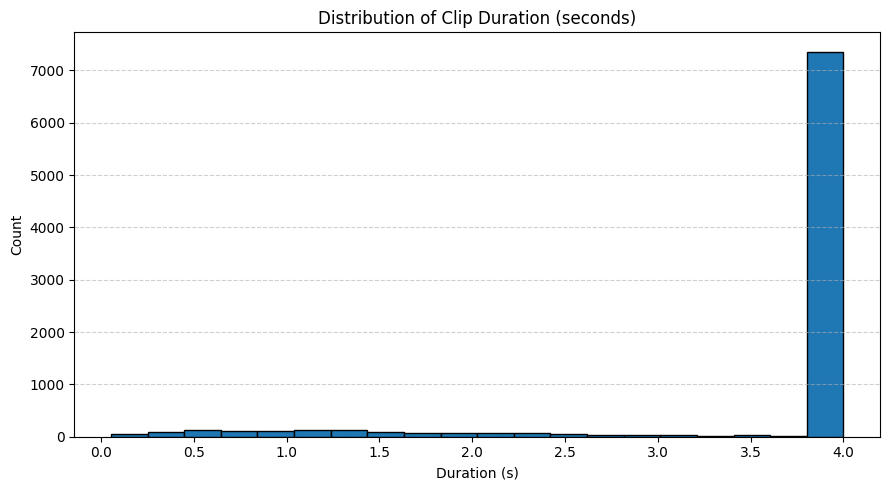

In [13]:
plt.figure(figsize=(9,5))
plt.hist(df["duration"], bins=20, edgecolor="black")
plt.title("Distribution of Clip Duration (seconds)")
plt.xlabel("Duration (s)")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

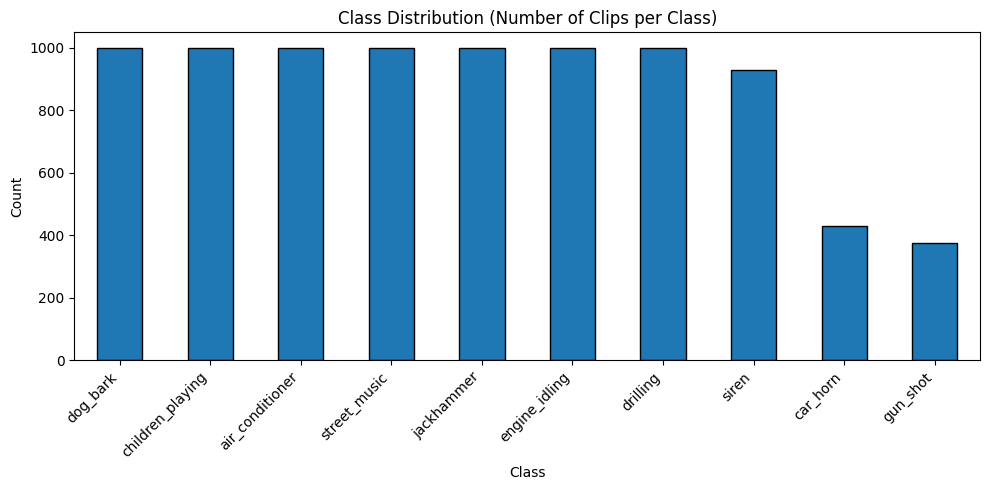

In [14]:
class_counts = df["class"].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10,5))
class_counts.plot(kind="bar", edgecolor="black")
plt.title("Class Distribution (Number of Clips per Class)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

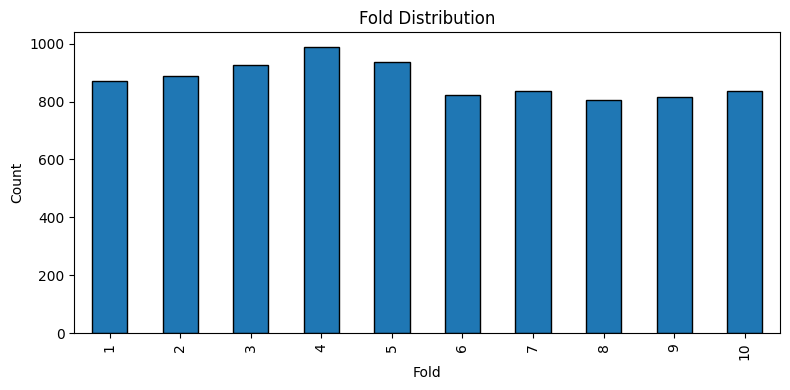

In [15]:
if "fold" in df.columns:
    fold_counts = df["fold"].value_counts().sort_index()
    plt.figure(figsize=(8,4))
    fold_counts.plot(kind="bar", edgecolor="black")
    plt.title("Fold Distribution")
    plt.xlabel("Fold")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

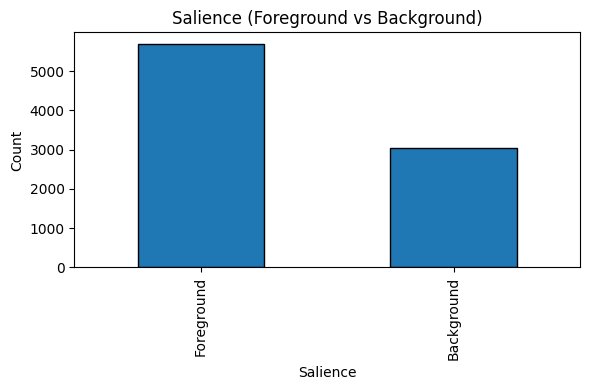

In [16]:
if "salience" in df.columns:
    sal_map = {1: "Foreground", 2: "Background"}
    sal_counts = df["salience"].map(sal_map).value_counts()
    plt.figure(figsize=(6,4))
    sal_counts.plot(kind="bar", edgecolor="black")
    plt.title("Salience (Foreground vs Background)")
    plt.xlabel("Salience")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

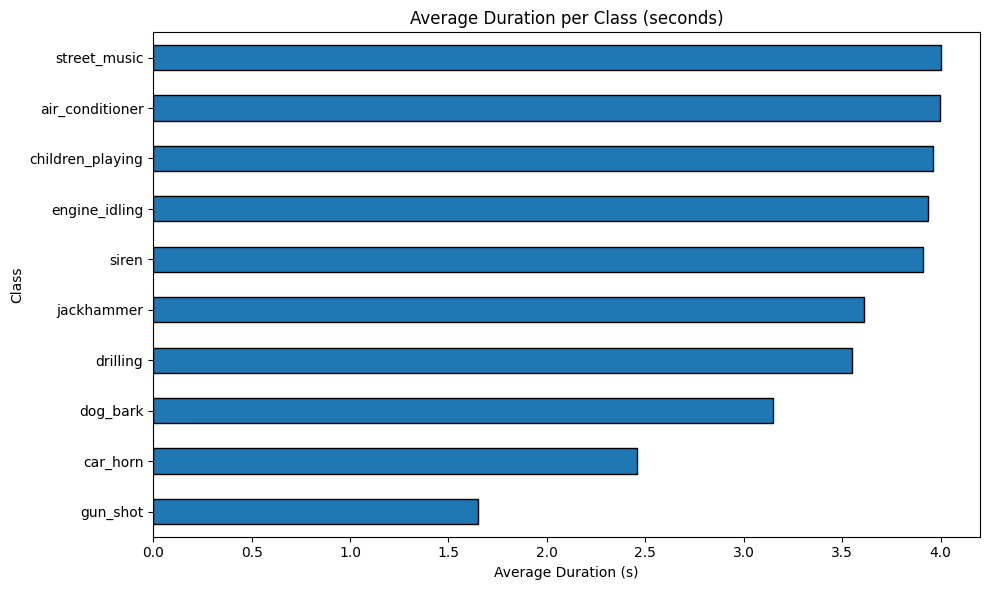

In [17]:
avg_dur_by_class = df.groupby("class")["duration"].mean().sort_values()
plt.figure(figsize=(10,6))
avg_dur_by_class.plot(kind="barh", edgecolor="black")
plt.title("Average Duration per Class (seconds)")
plt.xlabel("Average Duration (s)")
plt.ylabel("Class")
plt.tight_layout()
plt.show()

<Figure size 1100x600 with 0 Axes>

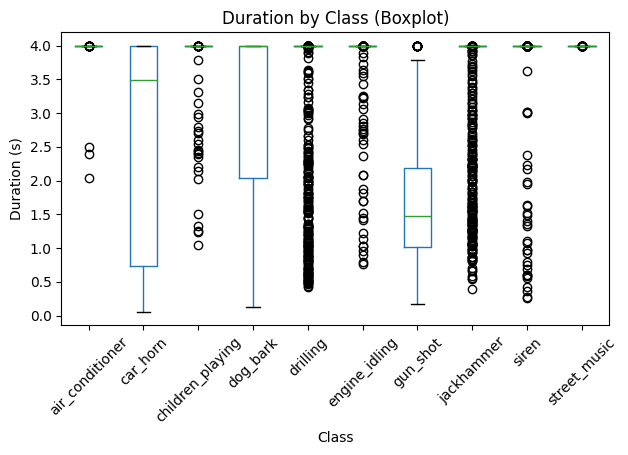

In [18]:
plt.figure(figsize=(11,6))
# pandas boxplot uses matplotlib under the hood
df.boxplot(column="duration", by="class", grid=False, rot=45)
plt.suptitle("")  # remove default pandas title
plt.title("Duration by Class (Boxplot)")
plt.xlabel("Class")
plt.ylabel("Duration (s)")
plt.tight_layout()
plt.show()